#EXERCISE 1

In [1]:
!pip install pgmpy

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00


#EXERCISE 2

In [5]:
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])

#EXERCISE 3

In [11]:
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.4], [0.6]])
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.55], [0.45]])
cpd_blood_pressure = TabularCPD(variable='Blood Pressure', variable_card=2, values=[[0.7], [0.3]])

cpd_heart_disease = TabularCPD(
    variable='Heart Disease', variable_card=2,
    values=[
        [0.99, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6,
         0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2,
         0.15, 0.1, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65,
         0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25,
         0.2, 0.15, 0.1, 0.05, 0.95, 0.9, 0.85, 0.8,
         0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4],
        [0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
         0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
         0.85, 0.9, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
         0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75,
         0.8, 0.85, 0.9, 0.95, 0.05, 0.1, 0.15, 0.2,
         0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2]
)

cpd_chest_pain = TabularCPD(
    variable='Chest Pain', variable_card=2,
    values=[[0.8, 0.3], [0.2, 0.7]],
    evidence=['Heart Disease'], evidence_card=[2]
)

cpd_ecg_result = TabularCPD(
    variable='ECG Result', variable_card=2,
    values=[[0.6, 0.1], [0.4, 0.9]],
    evidence=['Heart Disease'], evidence_card=[2]
)

model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure, cpd_heart_disease, cpd_chest_pain, cpd_ecg_result)
assert model.check_model()

#EXERCISE 4

In [7]:
inference = VariableElimination(model)
query_1 = inference.query(variables=['Heart Disease'], evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 0, 'Blood Pressure': 0})
print(query_1)
query_2 = inference.query(variables=['ECG Result'], evidence={'Chest Pain': 1})
print(query_2)
query_3 = inference.query(variables=['Heart Disease'], evidence={'Exercise': 1})
print(query_3)

+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.5400 |
+------------------+----------------------+
| Heart Disease(1) |               0.4600 |
+------------------+----------------------+
+---------------+-------------------+
| ECG Result    |   phi(ECG Result) |
+===============+===================+
| ECG Result(0) |            0.2247 |
+---------------+-------------------+
| ECG Result(1) |            0.7753 |
+---------------+-------------------+
+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.5150 |
+------------------+----------------------+
| Heart Disease(1) |               0.4850 |
+------------------+----------------------+


#EXERCISE 5

In [8]:
import numpy as np
data = pd.DataFrame(np.random.randint(0, 2, size=(1000, 7)), columns=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure', 'Chest Pain', 'ECG Result'])
data['Heart Disease'] = np.where((data['Age'] == 1) & (data['Smoking'] == 1), 1, 0)

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

+--------+-------+
| Age(0) | 0.526 |
+--------+-------+
| Age(1) | 0.474 |
+--------+-------+
+------------+-------+
| Smoking(0) | 0.507 |
+------------+-------+
| Smoking(1) | 0.493 |
+------------+-------+
+-------------+-------+
| Exercise(0) | 0.455 |
+-------------+-------+
| Exercise(1) | 0.545 |
+-------------+-------+
+----------------+-------+
| Cholesterol(0) | 0.507 |
+----------------+-------+
| Cholesterol(1) | 0.493 |
+----------------+-------+
+-------------------+-------+
| Blood Pressure(0) | 0.508 |
+-------------------+-------+
| Blood Pressure(1) | 0.492 |
+-------------------+-------+
+------------------+-------------------+-----+-------------------+-------------------+
| Age              | Age(0)            | ... | Age(1)            | Age(1)            |
+------------------+-------------------+-----+-------------------+-------------------+
| Blood Pressure   | Blood Pressure(0) | ... | Blood Pressure(1) | Blood Pressure(1) |
+------------------+-----------------

#EXERCISE 6

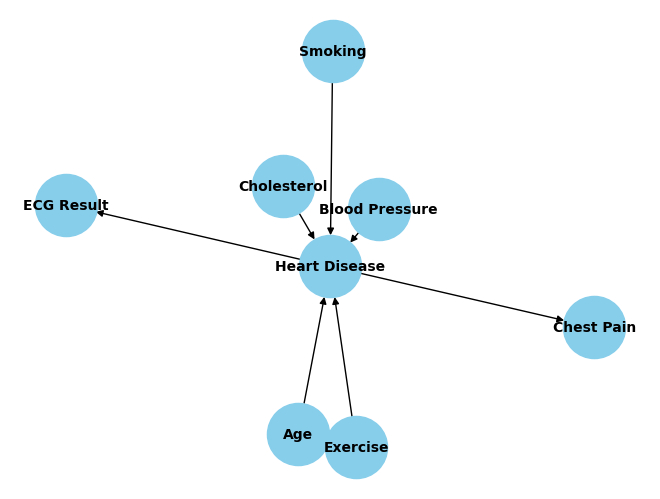

In [9]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.show()